/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.2810 - loss: 1.9257 - val_accuracy: 0.5011 - val_loss: 1.3924
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4877 - loss: 1.4308 - val_accuracy: 0.5668 - val_loss: 1.1998
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5445 - loss: 1.2771 - val_accuracy: 0.6082 - val_loss: 1.0952
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5911 - loss: 1.1588 - val_accuracy: 0.6363 - val_loss: 1.0253
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6213 - loss: 1.0818 - val_accuracy: 0.6582 - val_loss: 0.9765
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.6380 - loss: 1.0308 - val_accuracy: 0.6622 - val_loss: 0.9484
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6646 - loss: 0.9673 - val_accuracy: 0.6722 - val_loss: 0.9630
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6758 -

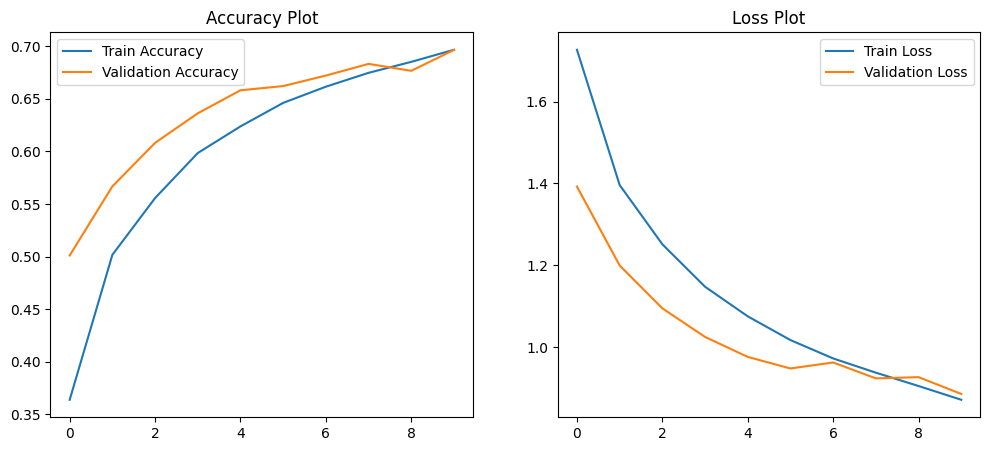

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted classes: [3 8 8 0 6]
True classes: [3 8 8 0 6]


In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define CNN Architecture (Adjusted for CIFAR-10)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the Model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Plot')
plt.show()

# Make Predictions on a few test images
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

In [3]:

# Evaluate the Model on the Test Set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss*100:.2f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Loss: 88.62
Test Accuracy: 69.66


In [5]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(true_classes,predicted_classes)
print(f"Accuracy Score: {accuracy_score*100:.2f}")

Accuracy Score: 100.00
